<a href="https://colab.research.google.com/github/kausthab88/OmdenaSchool/blob/main/OmdenaSchool_Session2_August3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/sample_data/titanic.csv')



In [47]:
# Display the first few rows of the DataFrame
df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Check the number of survivors
df['Survived'].sum()



342

In [49]:
# Check the number of males and females
df['Sex'].value_counts()



male      577
female    314
Name: Sex, dtype: int64

In [50]:
# Get the average age of passengers
df['Age'].mean()


29.69911764705882

In [51]:
# Get the median fare
df['Fare'].median()



14.4542

In [52]:
# Find out the passenger with the highest fare
df[df['Fare'] == df['Fare'].max()]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [53]:
# Find out the survival rate by sex
df.groupby('Sex')['Survived'].mean()



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [54]:
# Find out the survival rate by passenger class
df.groupby('Pclass')['Survived'].mean()



Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [55]:
# Get the names of passengers who are above 70 years old
df[df['Age'] > 70]['Name']



96                Goldschmidt, Mr. George B
116                    Connors, Mr. Patrick
493                 Artagaveytia, Mr. Ramon
630    Barkworth, Mr. Algernon Henry Wilson
851                     Svensson, Mr. Johan
Name: Name, dtype: object

In [56]:
# Check for missing values
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# Fill missing age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [58]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
# Drop the 'Cabin' column, as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)



In [60]:
# Create a new column called 'FamilySize' that is the sum of 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']



In [61]:
# Find out the survival rate by family size
df.groupby('FamilySize')['Survived'].mean()



FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [62]:
# Create a new column called 'IsAlone' that indicates whether the passenger is travelling alone
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)



In [63]:
# Find out the survival rate for passengers travelling alone vs. those travelling with family
df.groupby('IsAlone')['Survived'].mean()



IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [64]:
# Find out the survival rate for different age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins)
df.groupby('AgeGroup')['Survived'].mean()



AgeGroup
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.334152
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64

In [65]:
#How does the embarkation point relate to fare?

df.groupby('Embarked')['Fare'].mean()


Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

# SESSION 3

In [35]:
# Convert categorical 'Sex' column to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})



In [36]:
# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'])

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,AgeGroup,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,0,"(20, 30]",0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,"(30, 40]",1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,"(20, 30]",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,"(30, 40]",0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,"(30, 40]",0,0,1


In [38]:
# Correlation matrix to understand the relationships between different variables
df.corr()['Survived'].sort_values()


<ipython-input-38-34e7a1e4dd76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Survived'].sort_values()


Pclass        -0.338481
IsAlone       -0.203367
Embarked_S    -0.155660
Age           -0.064910
SibSp         -0.035322
PassengerId   -0.005007
Embarked_Q     0.003650
FamilySize     0.016639
Parch          0.081629
Embarked_C     0.168240
Fare           0.257307
Sex            0.543351
Survived       1.000000
Name: Survived, dtype: float64

<Axes: >

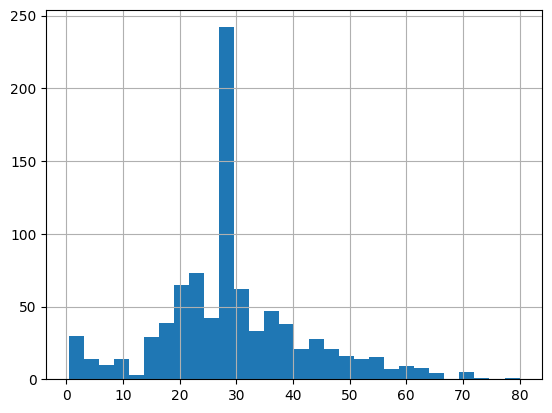

In [39]:
df['Age'].hist(bins=30)


In [40]:
df['Sex'].value_counts()


0    577
1    314
Name: Sex, dtype: int64

<Axes: >

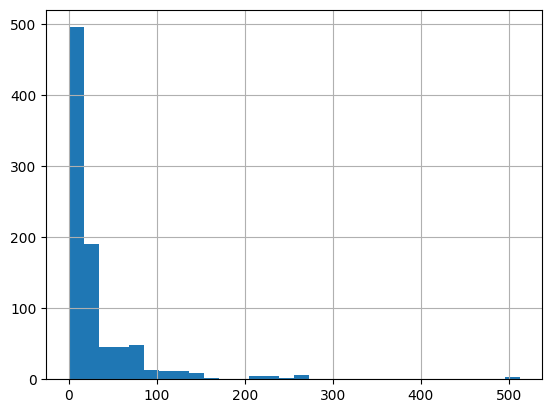

In [42]:
#distribution of ticket fare

df['Fare'].hist(bins=30)


In [43]:
#How does the fare correlate with passenger class

df.groupby('Pclass')['Fare'].mean()


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [44]:
#How does the fare correlate with survival rate

df.groupby('Survived')['Fare'].mean()


Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

KeyError: ignored